# Scrape league table to get team links

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import time  

In [2]:
url = 'https://fbref.com/es/comps/12/Estadisticas-de-La-Liga'

In [3]:
# extraer texto de url en bruto
text_web = requests.get(url).text
print(text_web)

    
      
<!DOCTYPE html>
<html data-version="klecko-" data-root="/home/fb/deploy/www/base" lang="es" class="no-js" >
<head>
    <meta charset="utf-8">
    <meta http-equiv="x-ua-compatible" content="ie=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=2.0" />
    <link rel="dns-prefetch" href="https://cdn.ssref.net/req/202403072" />
<!-- InMobi Choice. Consent Manager Tag v3.0 (for TCF 2.2) -->
<script type="text/javascript" async=true>
(function() {
  var host = window.location.hostname;
  var element = document.createElement('script');
  var firstScript = document.getElementsByTagName('script')[0];
  var url = 'https://cmp.inmobi.com'
    .concat('/choice/', 'XwNYEpNeFfhfr', '/', host, '/choice.js?tag_version=V3');
  var uspTries = 0;
  var uspTriesLimit = 3;
  element.async = true;
  element.type = 'text/javascript';
  element.src = url;

  firstScript.parentNode.insertBefore(element, firstScript);

  function makeStub() {
    var TCF_

In [4]:
# le damos formato para evitar posibles errores
soup = BeautifulSoup(text_web,'lxml')
print(soup)

<!DOCTYPE html>
<html class="no-js" data-root="/home/fb/deploy/www/base" data-version="klecko-" lang="es">
<head>
<meta charset="utf-8"/>
<meta content="ie=edge" http-equiv="x-ua-compatible"/>
<meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport"/>
<link href="https://cdn.ssref.net/req/202403072" rel="dns-prefetch"/>
<!-- InMobi Choice. Consent Manager Tag v3.0 (for TCF 2.2) -->
<script async="true" type="text/javascript">
(function() {
  var host = window.location.hostname;
  var element = document.createElement('script');
  var firstScript = document.getElementsByTagName('script')[0];
  var url = 'https://cmp.inmobi.com'
    .concat('/choice/', 'XwNYEpNeFfhfr', '/', host, '/choice.js?tag_version=V3');
  var uspTries = 0;
  var uspTriesLimit = 3;
  element.async = true;
  element.type = 'text/javascript';
  element.src = url;

  firstScript.parentNode.insertBefore(element, firstScript);

  function makeStub() {
    var TCF_LOCATOR_NAME = '__tcfapiLoc

In [5]:
# lo indenta
print(soup.prettify())

<!DOCTYPE html>
<html class="no-js" data-root="/home/fb/deploy/www/base" data-version="klecko-" lang="es">
 <head>
  <meta charset="utf-8"/>
  <meta content="ie=edge" http-equiv="x-ua-compatible"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=2.0" name="viewport"/>
  <link href="https://cdn.ssref.net/req/202403072" rel="dns-prefetch"/>
  <!-- InMobi Choice. Consent Manager Tag v3.0 (for TCF 2.2) -->
  <script async="true" type="text/javascript">
   (function() {
  var host = window.location.hostname;
  var element = document.createElement('script');
  var firstScript = document.getElementsByTagName('script')[0];
  var url = 'https://cmp.inmobi.com'
    .concat('/choice/', 'XwNYEpNeFfhfr', '/', host, '/choice.js?tag_version=V3');
  var uspTries = 0;
  var uspTriesLimit = 3;
  element.async = true;
  element.type = 'text/javascript';
  element.src = url;

  firstScript.parentNode.insertBefore(element, firstScript);

  function makeStub() {
    var TCF_LOCATOR_NAM

In [6]:
urls = soup.find_all('a')
urls

[<a class="pt" href="https://fbref.com/pt/comps/12/Estadisticas-de-La-Liga" onclick="sr_set_trans_choice('pt');">Português</a>,
 <a class="en" href="https://fbref.com/en/comps/12/Estadisticas-de-La-Liga" onclick="sr_set_trans_choice('en');">English</a>,
 <a class="fr" href="https://fbref.com/fr/comps/12/Estadisticas-de-La-Liga" onclick="sr_set_trans_choice('fr');">Français</a>,
 <a class="it" href="https://fbref.com/it/comps/12/Estadisticas-de-La-Liga" onclick="sr_set_trans_choice('it');">Italiano</a>,
 <a class="de" href="https://fbref.com/de/comps/12/Estadisticas-de-La-Liga" onclick="sr_set_trans_choice('de');">Deutsch</a>,
 <a class="es" href="https://fbref.com/es/comps/12/Estadisticas-de-La-Liga" onclick="sr_set_trans_choice('es');">Español</a>,
 <a href="https://www.sports-reference.com/?utm_source=fb&amp;utm_medium=sr_xsite&amp;utm_campaign=2023_01_srnav"><svg height="15px" width="20px"><use xlink:href="#ic-sr-pennant"></use></svg> Sports Reference ®</a>,
 <a href="https://www.ba

In [7]:
# from url select elements 275 to 294
LaLiga = urls[273:293]
LaLiga

[<a href="/es/equipos/53a2f082/Estadisticas-de-Real-Madrid">Real Madrid</a>,
 <a href="/es/equipos/9024a00a/Estadisticas-de-Girona">Girona</a>,
 <a href="/es/equipos/206d90db/Estadisticas-de-Barcelona">Barcelona</a>,
 <a href="/es/equipos/db3b9613/Estadisticas-de-Atletico-Madrid">Atlético Madrid</a>,
 <a href="/es/equipos/2b390eca/Estadisticas-de-Athletic-Club">Athletic Club</a>,
 <a href="/es/equipos/e31d1cd9/Estadisticas-de-Real-Sociedad">Real Sociedad</a>,
 <a href="/es/equipos/fc536746/Estadisticas-de-Real-Betis">Betis</a>,
 <a href="/es/equipos/dcc91a7b/Estadisticas-de-Valencia">Valencia</a>,
 <a href="/es/equipos/0049d422/Estadisticas-de-Las-Palmas">Las Palmas</a>,
 <a href="/es/equipos/03c57e2b/Estadisticas-de-Osasuna">Osasuna</a>,
 <a href="/es/equipos/2a8183b3/Estadisticas-de-Villarreal">Villarreal</a>,
 <a href="/es/equipos/7848bd64/Estadisticas-de-Getafe">Getafe</a>,
 <a href="/es/equipos/8d6fd021/Estadisticas-de-Alaves">Alavés</a>,
 <a href="/es/equipos/ad2be733/Estadistica

# Scrape tables 

In [8]:
import time
import random
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [9]:
# Function to scrape tables
def scrape_tables(url):
    time.sleep(20)
    
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    tables = soup.find_all('table')
    selected_tables = [tables[0], tables[4], tables[5], tables[8], tables[9], tables[11]]
    return selected_tables

In [10]:
# Function to convert scraped tables into DataFrames
def tables_to_dataframes(tables):
    dfs = []
    for table in tables:
        df = pd.read_html(str(table))[0]
        dfs.append(df)
    return dfs

In [11]:
LaLiga

[<a href="/es/equipos/53a2f082/Estadisticas-de-Real-Madrid">Real Madrid</a>,
 <a href="/es/equipos/9024a00a/Estadisticas-de-Girona">Girona</a>,
 <a href="/es/equipos/206d90db/Estadisticas-de-Barcelona">Barcelona</a>,
 <a href="/es/equipos/db3b9613/Estadisticas-de-Atletico-Madrid">Atlético Madrid</a>,
 <a href="/es/equipos/2b390eca/Estadisticas-de-Athletic-Club">Athletic Club</a>,
 <a href="/es/equipos/e31d1cd9/Estadisticas-de-Real-Sociedad">Real Sociedad</a>,
 <a href="/es/equipos/fc536746/Estadisticas-de-Real-Betis">Betis</a>,
 <a href="/es/equipos/dcc91a7b/Estadisticas-de-Valencia">Valencia</a>,
 <a href="/es/equipos/0049d422/Estadisticas-de-Las-Palmas">Las Palmas</a>,
 <a href="/es/equipos/03c57e2b/Estadisticas-de-Osasuna">Osasuna</a>,
 <a href="/es/equipos/2a8183b3/Estadisticas-de-Villarreal">Villarreal</a>,
 <a href="/es/equipos/7848bd64/Estadisticas-de-Getafe">Getafe</a>,
 <a href="/es/equipos/8d6fd021/Estadisticas-de-Alaves">Alavés</a>,
 <a href="/es/equipos/ad2be733/Estadistica

In [12]:
# create urls from href
# https://fbref.com + href
urls = []
for link in LaLiga:
    urls.append('https://fbref.com' + link.get('href'))
urls


['https://fbref.com/es/equipos/53a2f082/Estadisticas-de-Real-Madrid',
 'https://fbref.com/es/equipos/9024a00a/Estadisticas-de-Girona',
 'https://fbref.com/es/equipos/206d90db/Estadisticas-de-Barcelona',
 'https://fbref.com/es/equipos/db3b9613/Estadisticas-de-Atletico-Madrid',
 'https://fbref.com/es/equipos/2b390eca/Estadisticas-de-Athletic-Club',
 'https://fbref.com/es/equipos/e31d1cd9/Estadisticas-de-Real-Sociedad',
 'https://fbref.com/es/equipos/fc536746/Estadisticas-de-Real-Betis',
 'https://fbref.com/es/equipos/dcc91a7b/Estadisticas-de-Valencia',
 'https://fbref.com/es/equipos/0049d422/Estadisticas-de-Las-Palmas',
 'https://fbref.com/es/equipos/03c57e2b/Estadisticas-de-Osasuna',
 'https://fbref.com/es/equipos/2a8183b3/Estadisticas-de-Villarreal',
 'https://fbref.com/es/equipos/7848bd64/Estadisticas-de-Getafe',
 'https://fbref.com/es/equipos/8d6fd021/Estadisticas-de-Alaves',
 'https://fbref.com/es/equipos/ad2be733/Estadisticas-de-Sevilla',
 'https://fbref.com/es/equipos/2aa12281/Est

In [13]:
import requests
from bs4 import BeautifulSoup

url = "https://fbref.com/es/equipos/53a2f082/Estadisticas-de-Real-Madrid"
response = requests.get(url)

response.content

b'    \n      \n<!DOCTYPE html>\n<html data-version="klecko-" data-root="/home/fb/deploy/www/base" lang="es" class="no-js" >\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="x-ua-compatible" content="ie=edge">\n    <meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=2.0" />\n    <link rel="dns-prefetch" href="https://cdn.ssref.net/req/202403072" />\n<!-- InMobi Choice. Consent Manager Tag v3.0 (for TCF 2.2) -->\n<script type="text/javascript" async=true>\n(function() {\n  var host = window.location.hostname;\n  var element = document.createElement(\'script\');\n  var firstScript = document.getElementsByTagName(\'script\')[0];\n  var url = \'https://cmp.inmobi.com\'\n    .concat(\'/choice/\', \'XwNYEpNeFfhfr\', \'/\', host, \'/choice.js?tag_version=V3\');\n  var uspTries = 0;\n  var uspTriesLimit = 3;\n  element.async = true;\n  element.type = \'text/javascript\';\n  element.src = url;\n\n  firstScript.parentNode.insertBefore(element, firstScrip

In [14]:
# Scraping and organizing tables into DataFrames
dfs_estandar = []
dfs_tiros = []
dfs_pases = []
dfs_defensa = []
dfs_posesion = []
dfs_diversas = []

for url in urls:
    try:
        tables = scrape_tables(url)
        dfs = tables_to_dataframes(tables)
        dfs_estandar.append(dfs[0])
        dfs_tiros.append(dfs[1])
        dfs_pases.append(dfs[2])
        dfs_defensa.append(dfs[3])
        dfs_posesion.append(dfs[4])
        dfs_diversas.append(dfs[5])
        time.sleep(20) 
    except Exception as e:
        print(f"Error scraping {url}: {e}")


# Combining DataFrames
df_estandar = pd.concat(dfs_estandar, ignore_index=True)
df_tiros = pd.concat(dfs_tiros, ignore_index=True)
df_pases = pd.concat(dfs_pases, ignore_index=True)
df_defensa = pd.concat(dfs_defensa, ignore_index=True)
df_posesion = pd.concat(dfs_posesion, ignore_index=True)
df_diversas = pd.concat(dfs_diversas, ignore_index=True)


C:\Users\imjos\AppData\Local\Temp\ipykernel_28908\3096713703.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
C:\Users\imjos\AppData\Local\Temp\ipykernel_28908\3096713703.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
C:\Users\imjos\AppData\Local\Temp\ipykernel_28908\3096713703.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]
C:\Users\imjos\AppData\Local\Temp\ipykernel_28908\3096713703.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a

In [15]:
# remove first rows from df copy
estandar = df_estandar.copy()
tiros = df_tiros.copy()
pases = df_pases.copy()
defensa = df_defensa.copy()
posesion = df_posesion.copy()
diversas = df_diversas.copy()

# remove first multiindex row
estandar.columns = estandar.columns.droplevel(0)
tiros.columns = tiros.columns.droplevel(0)
pases.columns = pases.columns.droplevel(0)
defensa.columns = defensa.columns.droplevel(0)
posesion.columns = posesion.columns.droplevel(0)
diversas.columns = diversas.columns.droplevel(0)


In [16]:
# save all to csv 
estandar.to_csv('estandar.csv')
tiros.to_csv('tiros.csv')
pases.to_csv('pases.csv')   
defensa.to_csv('defensa.csv')
posesion.to_csv('posesion.csv')
diversas.to_csv('diversas.csv')


# Clean and prepare

In [17]:
# load al csv files 
import pandas as pd
import numpy as np
estandar = pd.read_csv('estandar.csv')
tiros = pd.read_csv('tiros.csv')
pases = pd.read_csv('pases.csv')
defensa = pd.read_csv('defensa.csv')
posesion = pd.read_csv('posesion.csv')
diversas = pd.read_csv('diversas.csv')

In [18]:
# Specify the midfield positions
mediocentros = ['CC', 'CC,DL', 'CC,DF', 'DL,CC', 'DF,CC']

# Filter each DataFrame for midfield positions
estandar_medios = estandar[estandar['Posc'].isin(mediocentros)]
tiros_medios = tiros[tiros['Posc'].isin(mediocentros)]
pases_medios = pases[pases['Posc'].isin(mediocentros)]
defensa_medios = defensa[defensa['Posc'].isin(mediocentros)]
posesion_medios = posesion[posesion['Posc'].isin(mediocentros)]
diversas_medios = diversas[diversas['Posc'].isin(mediocentros)]

In [19]:
estandar_medios

Unnamed: 0              Jugador     País   Posc    Edad    PJ  Titular  \
0             0    Federico Valverde   uy URU     CC  25-236  28.0       26   
3             3      Jude Bellingham  eng ENG  CC,DL  20-259  22.0       22   
4             4           Toni Kroos   de GER     CC  34-070  27.0       19   
7             7  Aurélien Tchouaméni   fr FRA  CC,DF  24-047  22.0       17   
10           10    Eduardo Camavinga   fr FRA  CC,DF  21-125  21.0       15   
..          ...                  ...      ...    ...     ...   ...      ...   
751         751       Marciano Sanca   gw GNB  DL,CC  20-011   6.0        0   
753         753         Arvin Appiah  eng ENG  DL,CC  23-069   0.0        0   
754         754           Gui Guedes   pt POR     CC  21-332   0.0        0   
756         756          Marcos Peña   es ESP     CC  19-052   0.0        0   
758         758     Martin Šviderský   sk SVK     CC  21-162   0.0        0   

        Mín  90 s  Gls.  ...  G+A.1  G-TP.1  G+A-TP  xG.1  xAG.1  xG+xAG  \
0    2290.0  25.4   1.0  ...   0.20    0.04    0.20  0.11   0.18    0.28   
3    1867.0  20.7  16.0  ...   0.92    0.72    0.87  0.50   0.17    0.67   
4    1720.0  19.1   1.0  ...   0.42    0.05    0.42  0.08   0.21    0.29   
7    1537.0  17.1   2.0  ...   0.18    0.12    0.18  0.06   0.03    0.09   
10   1290.0  14.3   0.0  ...   0.07    0.00    0.07  0.05   0.05    0.11   
..      ...   ...   ...  ...    ...     ...     ...   ...    ...     ...   
751    43.0   0.5   0.0  ...   0.00    0.00    0.00  0.06   0.10    0.17   
753     NaN   NaN   NaN  ...    NaN     NaN     NaN   NaN    NaN     NaN   
754     NaN   NaN   NaN  ...    NaN     NaN     NaN   NaN    NaN     NaN   
756     NaN   NaN   NaN  ...    NaN     NaN     NaN   NaN    NaN     NaN   
758     NaN   NaN   NaN  ...    NaN     NaN     NaN   NaN    NaN     NaN   

     npxG.1  npxG+xAG.1  Partidos  PJ.1  
0      0.11        0.28  Partidos   NaN  
3      0.46        0.63  Partidos   NaN  
4      0.08        0.29  Partidos   NaN  
7      0.06        0.09  Partidos   NaN  
10     0.05        0.11  Partidos   NaN  
..      ...         ...       ...   ...  
751    0.06        0.17  Partidos   NaN  
753     NaN         NaN  Partidos   NaN  
754     NaN         NaN  Partidos   NaN  
756     NaN         NaN  Partidos   NaN  
758     NaN         NaN  Partidos   NaN  

[319 rows x 36 columns]

In [20]:
# select columns from a copy of the DataFrame
estandar_medios_copy = estandar_medios.copy()
tiros_medios_copy = tiros_medios.copy()
pases_medios_copy = pases_medios.copy()
defensa_medios_copy = defensa_medios.copy()
posesion_medios_copy = posesion_medios.copy()
diversas_medios_copy = diversas_medios.copy()

In [21]:
estandar_medios_copy = estandar_medios_copy[['Jugador','PJ','90 s','Mín','Gls..1','Ast', 'xG']]
tiros_medios_copy = tiros_medios_copy[['Jugador','90 s','T/90','TalArc/90','G/T','Dist']]
pases_medios_copy = pases_medios_copy[['Jugador','90 s','% Cmp','% Cmp.1','% Cmp.2','% Cmp.3','xA']]
defensa_medios_copy = defensa_medios_copy[['Jugador','90 s','TklG','Tkl%']]
posesion_medios_copy = posesion_medios_copy[['Jugador','90 s', 'Toques','Exitosa%','Rec']]
diversas_medios_copy = diversas_medios_copy[['Jugador','90 s', 'Fls', 'FR','Int','Recup.','% de ganados']]

In [22]:
# see diego lopéz in estandar_medios_copy
estandar_medios_copy[estandar_medios_copy['Jugador'] == 'Diego López']

Jugador    PJ  90 s     Mín  Gls..1   Ast   xG
272  Diego López  25.0  19.2  1732.0    0.16  0.26  2.4

In [23]:
estandar_medios_copy

Jugador    PJ  90 s     Mín  Gls..1   Ast    xG
0      Federico Valverde  28.0  25.4  2290.0    0.04  0.16   2.7
3        Jude Bellingham  22.0  20.7  1867.0    0.77  0.14  10.3
4             Toni Kroos  27.0  19.1  1720.0    0.05  0.37   1.5
7    Aurélien Tchouaméni  22.0  17.1  1537.0    0.12  0.06   1.0
10     Eduardo Camavinga  21.0  14.3  1290.0    0.00  0.07   0.7
..                   ...   ...   ...     ...     ...   ...   ...
751       Marciano Sanca   6.0   0.5    43.0    0.00  0.00   0.0
753         Arvin Appiah   0.0   NaN     NaN     NaN   NaN   NaN
754           Gui Guedes   0.0   NaN     NaN     NaN   NaN   NaN
756          Marcos Peña   0.0   NaN     NaN     NaN   NaN   NaN
758     Martin Šviderský   0.0   NaN     NaN     NaN   NaN   NaN

[319 rows x 7 columns]

In [24]:
# rename columns 
# Gls..1 to goles_x_90
# Ast to asistencia_x_90

estandar_medios_copy.rename(columns={'PJ':'GP',
                                'Gls..1':'goals per 90',
                                'Mín':'minutes',
                                'Ast':'assists per 90'}, inplace=True)



In [25]:
tiros_medios_copy.rename(columns={'T/90':'shots per 90',
                                'TalArc/90':'shots target 90',
                                'G/T':'goal per shot',
                                'Dist':'shot mean dist'}, inplace=True)

In [26]:
pases_medios_copy.rename(columns={'% Cmp':'completed pass',
                                '% Cmp.1':'short completed pass',
                                '% Cmp.2':'med completed pass',
                                '% Cmp.3':'long completed pass'}, inplace=True)

In [27]:
defensa_medios_copy.rename(columns={'TklG':'tackle wit ball rec',
                                'Tkl%':'% duel won'}, inplace=True)

In [28]:
posesion_medios_copy.rename(columns={'Toques':'ball touch per 90',
                                'Exitosa%':'% dribble',
                                'Rec':'% passes received'}, inplace=True)

In [29]:
diversas_medios_copy.rename(columns={'Fls':'committed fouls per 90',
                                'FR':'received fouls per 90',
                                'Int':'interceptions per 90',
                                'Recup.':'loose balls recovered 90',
                                '% de ganados':'% aerials duels won'}, inplace=True)

In [30]:
import pandas as pd

# Merge estandar_medios_copy with tiros_medios_copy
merged_df = pd.merge(estandar_medios_copy, tiros_medios_copy, on=['Jugador', '90 s'], how='inner')

# Merge the rest of the DataFrames one by one
merged_df = pd.merge(merged_df, pases_medios_copy, on=['Jugador', '90 s'], how='inner')
merged_df = pd.merge(merged_df, defensa_medios_copy, on=['Jugador', '90 s'], how='inner')
merged_df = pd.merge(merged_df, posesion_medios_copy, on=['Jugador', '90 s'], how='inner')
LaLiga_medios_stats = pd.merge(merged_df, diversas_medios_copy, on=['Jugador', '90 s'], how='inner')


In [31]:
LaLiga_medios_stats['Jugador'].unique()

array(['Federico Valverde', 'Jude Bellingham', 'Toni Kroos',
       'Aurélien Tchouaméni', 'Eduardo Camavinga', 'Luka Modrić',
       'Brahim Díaz', 'Dani Ceballos', 'Arda Güler', 'Nicolás Paz',
       'Gonzalo García', 'Aleix García', 'Miguel Gutiérrez', 'Sávio',
       'Iván Martín', 'Viktor Tsyhankov', 'Yan Couto', 'Yangel Herrera',
       'David López', 'Portu', 'Pablo Torre', 'Valery Fernández',
       'Jhon Solis', 'Ibrahima Kebe', 'Silvi Clúa', 'Jastin García',
       'İlkay Gündoğan', 'Andreas Christensen', 'Frenkie de Jong',
       'Pedri', 'Raphinha', 'Gavi', 'Oriol Romeu', 'Fermin López',
       'Sergi Roberto', 'Marc Guiu', 'Abdessamad Ezzalzouli', 'Ansu Fati',
       'Antoine Griezmann', 'Koke', 'Marcos Llorente', 'Rodrigo De Paul',
       'Saúl Ñíguez', 'Pablo Barrios', 'Rodrigo Riquelme', 'Ángel Correa',
       'Thomas Lemar', 'Arthur Vermeeren', 'Salim El Jebari',
       'Oihan Sancet', 'Iñigo Ruiz de Galarreta', 'Mikel Vesga',
       'Beñat Prados', 'Ander Herrera', 'D

In [32]:
# change Jugador to player
LaLiga_medios_stats.rename(columns={'Jugador':'player'}, inplace=True)

In [33]:
# save to csv
LaLiga_medios_stats.to_csv('LaLiga_medios_stats.csv')

In [2]:
import pandas as pd
import numpy as np

# load csv
LaLiga_medios_stats = pd.read_csv('LaLiga_medios_stats.csv')


In [3]:
LaLiga_medios_stats.isnull().sum()

Unnamed: 0                   0
player                       0
GP                          81
90 s                         0
minutes                      0
goals per 90                 0
assists per 90               0
xG                           1
shots per 90                 0
shots target 90              0
goal per shot               35
shot mean dist              36
completed pass               4
short completed pass         4
med completed pass           6
long completed pass         22
xA                           1
tackle wit ball rec          0
% duel won                  26
ball touch per 90            1
% dribble                   26
% passes received            1
committed fouls per 90       0
received fouls per 90        0
interceptions per 90         0
loose balls recovered 90     1
% aerials duels won         20
dtype: int64

In [4]:
LaLiga_medios_stats.drop('Unnamed: 0', axis=1, inplace=True)


In [5]:
# normalize some data per 90 minutes
# ball touch per 90, % passes received, faults committed per 90, faults committed per 90, loose balls recovered 90, interceptions per 90
LaLiga_medios_stats['ball touch per 90'] = LaLiga_medios_stats['ball touch per 90'] / LaLiga_medios_stats['90 s']
LaLiga_medios_stats['% passes received'] = LaLiga_medios_stats['% passes received'] / LaLiga_medios_stats['90 s']
LaLiga_medios_stats['committed fouls per 90'] = LaLiga_medios_stats['committed fouls per 90'] / LaLiga_medios_stats['90 s']
LaLiga_medios_stats['received fouls per 90'] = LaLiga_medios_stats['received fouls per 90'] / LaLiga_medios_stats['90 s']
LaLiga_medios_stats['loose balls recovered 90'] = LaLiga_medios_stats['loose balls recovered 90'] / LaLiga_medios_stats['90 s']
LaLiga_medios_stats['interceptions per 90'] = LaLiga_medios_stats['interceptions per 90'] / LaLiga_medios_stats['90 s']
LaLiga_medios_stats['tackle wit ball rec'] = LaLiga_medios_stats['tackle wit ball rec'] / LaLiga_medios_stats['90 s']


In [6]:
# round to 2 decimals
LaLiga_medios_stats = LaLiga_medios_stats.round(2)

# minutes to int
LaLiga_medios_stats['minutes'] = LaLiga_medios_stats['minutes'].astype(int)

In [7]:
LaLiga_medios_stats.dtypes

player                       object
GP                          float64
90 s                        float64
minutes                       int32
goals per 90                float64
assists per 90              float64
xG                          float64
shots per 90                float64
shots target 90             float64
goal per shot               float64
shot mean dist              float64
completed pass              float64
short completed pass        float64
med completed pass          float64
long completed pass         float64
xA                          float64
tackle wit ball rec         float64
% duel won                  float64
ball touch per 90           float64
% dribble                   float64
% passes received           float64
committed fouls per 90      float64
received fouls per 90       float64
interceptions per 90        float64
loose balls recovered 90    float64
% aerials duels won         float64
dtype: object

# Create radars

In [8]:
import pandas as pd
from urllib.request import urlopen

import matplotlib.pyplot as plt
from PIL import Image

from mplsoccer import PyPizza, add_image, FontManager

from scipy import stats
import math

In [20]:
font_normal = FontManager(("https://github.com/google/fonts/blob/main/apache/cousine/Cousine-Regular.ttf?raw=true"))
font_italic = FontManager(("https://github.com/google/fonts/blob/main/apache/cousine/Cousine-Italic.ttf?raw=true"))
font_bold = FontManager(("https://github.com/google/fonts/blob/main/apache/cousine/Cousine-Bold.ttf?raw=true"))

In [9]:
LaLiga_medios_stats.shape

(279, 26)

In [10]:
LaLiga_medios_stats['minutes'].describe()

count     279.000000
mean      851.229391
std       711.378516
min         1.000000
25%       173.000000
50%       704.000000
75%      1437.000000
max      2408.000000
Name: minutes, dtype: float64

In [11]:
#jugadores over 700 minutes
medios = LaLiga_medios_stats[LaLiga_medios_stats['minutes'] > 700]

In [12]:
medios = medios[['player','GP','minutes',
                    'goals per 90', 'assists per 90', 'xG', 'shots per 90', 'shots target 90',
                     'completed pass', 'short completed pass', 'med completed pass','long completed pass','xA',
                     'tackle wit ball rec', '% duel won', 'interceptions per 90','loose balls recovered 90','% aerials duels won']]
medios

player    GP  minutes  goals per 90  assists per 90    xG  \
0      Federico Valverde  28.0     2290          0.04            0.16   2.7   
1        Jude Bellingham  22.0     1867          0.77            0.14  10.3   
2             Toni Kroos  27.0     1720          0.05            0.37   1.5   
3    Aurélien Tchouaméni  22.0     1537          0.12            0.06   1.0   
4      Eduardo Camavinga  21.0     1290          0.00            0.07   0.7   
..                   ...   ...      ...           ...             ...   ...   
270         Iddrisu Baba  22.0     1379          0.00            0.00   0.7   
271      Largie Ramazani  25.0     1323          0.20            0.27   4.0   
272       Gonzalo Melero  22.0      931          0.00            0.10   1.7   
273  Alejandro Pozo Pozo  17.0      845          0.00            0.00   0.4   
274   Luis Javier Suárez  10.0      718          0.50            0.00   5.5   

     shots per 90  shots target 90  completed pass  short completed pass  \
0            1.73             0.51            89.8                  95.4   
1            2.46             1.30            87.6                  91.8   
2            1.73             0.58            91.2                  96.9   
3            1.17             0.23            90.8                  94.9   
4            1.05             0.42            90.6                  94.2   
..            ...              ...             ...                   ...   
270          0.52             0.13            82.9                  84.1   
271          2.31             0.75            59.1                  71.0   
272          1.16             0.29            82.0                  85.9   
273          0.43             0.32            73.7                  87.2   
274          3.89             1.38            76.5                  79.4   

     med completed pass  long completed pass   xA  tackle wit ball rec  \
0                  89.9                 67.3  2.9                 1.10   
1                  89.0                 84.1  3.1                 1.26   
2                  94.1                 75.0  4.7                 1.47   
3                  92.5                 70.7  1.1                 0.99   
4                  92.7                 80.0  1.0                 2.17   
..                  ...                  ...  ...                  ...   
270                88.3                 77.6  0.4                 1.63   
271                61.9                 44.4  2.0                 0.48   
272                88.5                 63.6  0.9                 0.68   
273                73.6                 50.0  0.8                 1.06   
274                86.2                 78.6  0.5                 0.50   

     % duel won  interceptions per 90  loose balls recovered 90  \
0          70.0                  1.34                      5.43   
1          40.0                  0.92                      4.78   
2          43.8                  0.63                      6.34   
3          53.8                  1.29                      4.50   
4          66.7                  1.47                      7.83   
..          ...                   ...                       ...   
270        43.2                  0.72                      7.78   
271        23.1                  1.70                      4.49   
272        42.9                  0.39                      3.20   
273        55.6                  0.53                      4.89   
274        25.0                  0.00                      2.12   

     % aerials duels won  
0                   63.2  
1                   48.9  
2                   83.3  
3                   67.2  
4                   62.5  
..                   ...  
270                 63.0  
271                 12.5  
272                 40.0  
273                 40.0  
274                 25.0  

[140 rows x 18 columns]

In [13]:
# save to csv
medios.to_csv('medios.csv')

In [14]:
medios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 0 to 274
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   player                    140 non-null    object 
 1   GP                        105 non-null    float64
 2   minutes                   140 non-null    int32  
 3   goals per 90              140 non-null    float64
 4   assists per 90            140 non-null    float64
 5   xG                        140 non-null    float64
 6   shots per 90              140 non-null    float64
 7   shots target 90           140 non-null    float64
 8   completed pass            140 non-null    float64
 9   short completed pass      140 non-null    float64
 10  med completed pass        140 non-null    float64
 11  long completed pass       140 non-null    float64
 12  xA                        140 non-null    float64
 13  tackle wit ball rec       140 non-null    float64
 14  % duel won     

In [15]:
params = list(medios.columns[3:])

In [16]:
parametros_radar = ['player','PJ','minutes',
                    'goals per 90', 'assists per 90', 'xG', 'shots per 90', 'shots target 90',
                     'completed pass', 'short completed pass', 'med completed pass','long completed pass','xA',
                     'tackle wit ball rec', '% duel won', 'interceptions per 90','loose balls recovered 90','% aerials duels won']                                                                                      

In [17]:
jugador2 = list(medios[medios['player'] == 'Diego López'].iloc[0].values[3:])

In [18]:
values = []
for x in range(len(params)):   
    values.append(math.floor(stats.percentileofscore(medios[params[x]],jugador2[x])))

values

[70, 89, 70, 57, 75, 7, 1, 12, 46, 63, 23, 5, 38, 17, 47]

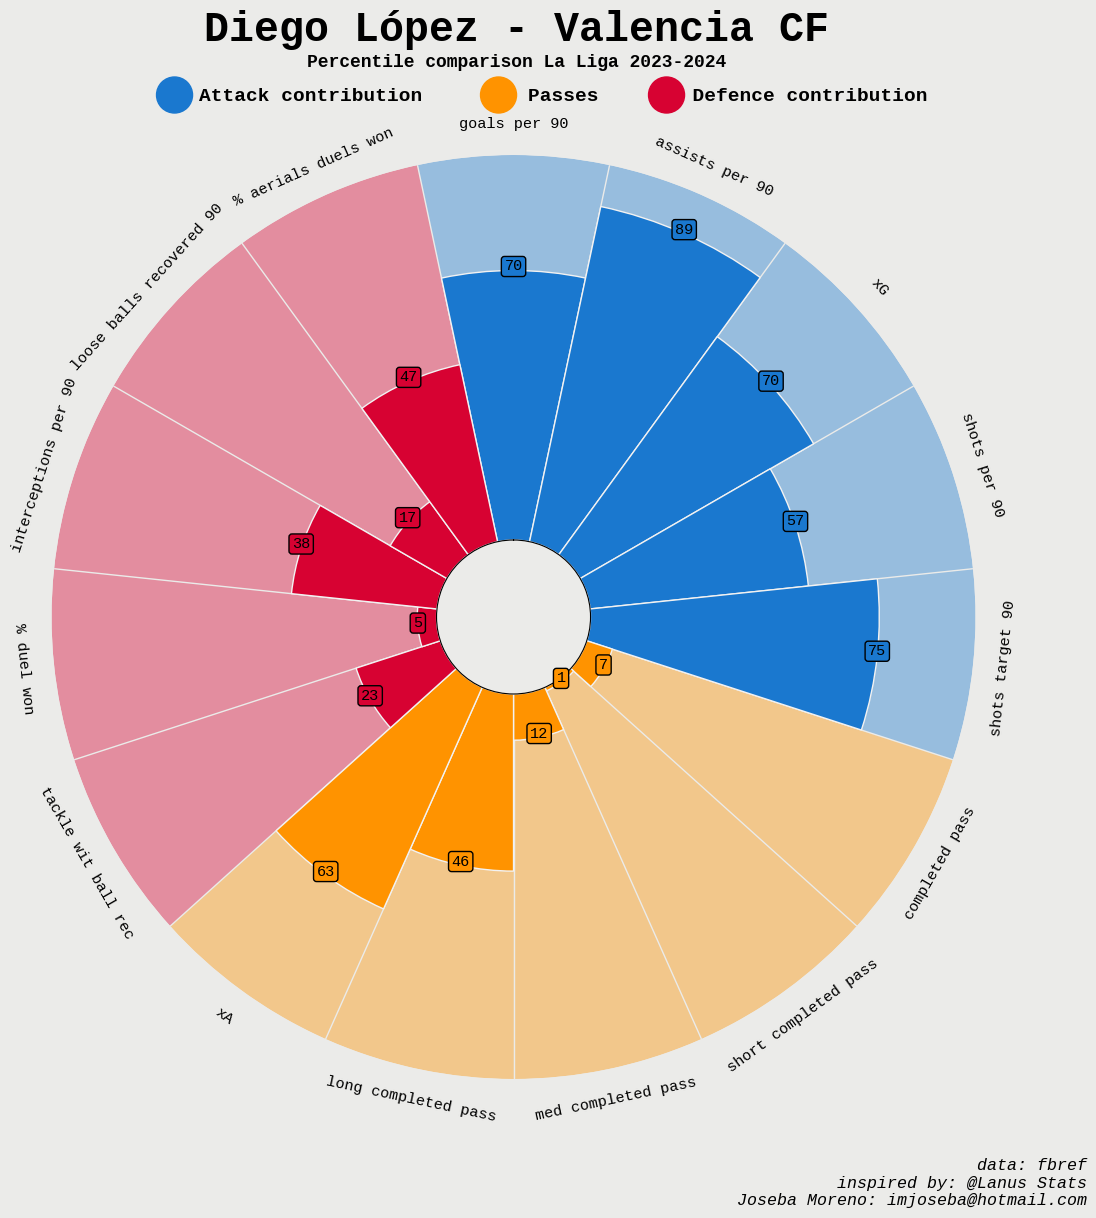

In [21]:
# parameter list --> ya definida

# value list --> ya definido
# The values are taken from the excellent fbref website (supplied by StatsBomb)

# color for the slices and text
slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ['#d70232'] * 5 
text_colors = ["#000000"] * 5 + ["#000000"] * 5 + ["#000000"] * 5

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#EBEBE9",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(12, 12),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,fontproperties=font_normal.prop,
        va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=11,fontproperties=font_normal.prop,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.975, "Diego López - Valencia CF", size=30,
    ha="center", fontproperties=font_bold.prop, color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.953,
    "Percentile comparison La Liga 2023-2024",
    size=13,
    ha="center",fontproperties=font_bold.prop ,color="#000000"
)

# add credits
CREDIT_1 = "data: fbref"
CREDIT_2 = "inspired by: @Lanus Stats"
CREDIT_3 = "Joseba Moreno: imjoseba@hotmail.com"

fig.text(
    0.99, 0.005, f"{CREDIT_1}\n{CREDIT_2}\n{CREDIT_3}", size=12,
    color="#000000",fontproperties=font_italic.prop,
    ha="right"
)
fig.text(
    0.25, 0.925, "Attack contribution         Passes        Defence contribution", size=14,
    fontproperties=font_bold.prop,    color="#000000"
)

# Circles (Rectangles in this case)
fig.patches.extend([
    plt.Circle(
        (0.23, 0.93), 0.015,
        fill=True, color="#1A78CF", zorder=3, clip_on=False,
        transform=fig.transFigure, figure=fig
    ),
    plt.Circle(
        (0.50, 0.93), 0.015,
        fill=True, color="#FF9300", zorder=3, clip_on=False,
        transform=fig.transFigure, figure=fig
    ),
    plt.Circle(
        (0.64, 0.93), 0.015,
        fill=True, color="#d70232", zorder=3, clip_on=False,
        transform=fig.transFigure, figure=fig
    ),
])

plt.show()